In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [61]:
xi_all=[]
for i in range(1,21):
    xi_in = np.loadtxt('/mnt/store1/oliverphilcox/DR12_QPM/xi_fine/mock_%d/xi_n90_m20_11.dat'%i,skiprows=2)
    xi_all.append(xi_in)
xi_r = np.genfromtxt('/mnt/store1/oliverphilcox/DR12_QPM/xi_fine/mock_%d/xi_n90_m20_11.dat'%i,max_rows=1)
xi_mu = np.genfromtxt('/mnt/store1/oliverphilcox/DR12_QPM/xi_fine/mock_%d/xi_n90_m20_11.dat'%i,max_rows=1,skip_header=1)

In [81]:
xi_r = np.genfromtxt('/mnt/store1/oliverphilcox/QPM_xi/QPM_mean.xi',max_rows=1)
xi_mu = np.genfromtxt('/mnt/store1/oliverphilcox/QPM_xi/QPM_mean.xi',max_rows=1,skip_header=1)
xi_in = np.loadtxt('/mnt/store1/oliverphilcox/QPM_xi/QPM_mean.xi',skiprows=2)

In [84]:
xi_r

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  21. ,  23. ,  25.5,  28.5,  31.5,  34.5,  38. ,
        42.5,  47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,
        87.5,  92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5,
       132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5,
       177.5, 182.5, 187.5, 192.5, 197.5])

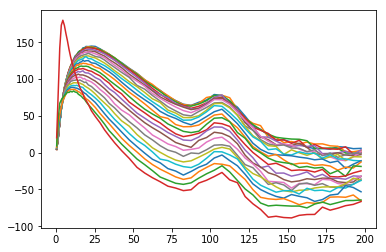

In [87]:
for i in range(len(xi_mu)):
    plt.plot(xi_r,xi_in[:,i]*xi_r**2.)
#plt.xlim([0,20])

In [88]:
xi_mu

array([0.02083333, 0.0625    , 0.10416667, 0.14583333, 0.1875    ,
       0.22916667, 0.27083333, 0.3125    , 0.35416667, 0.39583333,
       0.4375    , 0.47916667, 0.52083333, 0.5625    , 0.60416667,
       0.64583333, 0.6875    , 0.72916667, 0.77083333, 0.8125    ,
       0.85416667, 0.89583333, 0.9375    , 0.97916667])

In [72]:
DD = np.loadtxt('/mnt/store1/oliverphilcox/QPM_xi/QPM_mean.xi')

ValueError: Wrong number of columns at line 2

(0, 20)

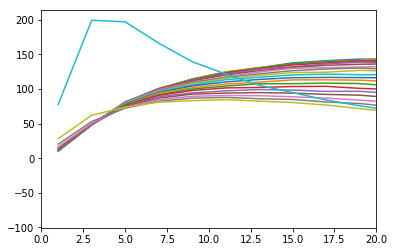

In [62]:
for i in range(20):
    plt.plot(xi_r,xi_r**2.*np.asarray(xi_all).mean(axis=0)[:,i])
plt.xlim([0,20])

In [58]:
xi_in = np.loadtxt('/mnt/store1/oliverphilcox/Legendre2PCF/mean_xi.xi',skiprows=2)
xi_r = np.genfromtxt('/mnt/store1/oliverphilcox/Legendre2PCF/mean_xi.xi',max_rows=1)
xi_mu = np.genfromtxt('/mnt/store1/oliverphilcox/Legendre2PCF/mean_xi.xi',max_rows=1,skip_header=1)

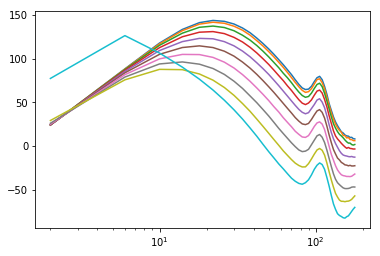

In [59]:
for m in range(10):
    plt.plot(xi_r,xi_in[:,m]*xi_r*xi_r);
plt.xscale('log')

#### Compute small-r 2PCF

In [4]:
xi_in_s = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/small_r_xi/xi_n10_m10_11.dat',skiprows=2)
xi_r_s = np.genfromtxt('/mnt/store1/oliverphilcox/PowerSpectra/small_r_xi/xi_n10_m10_11.dat',max_rows=1)
xi_mu_s = np.genfromtxt('/mnt/store1/oliverphilcox/PowerSpectra/small_r_xi/xi_n10_m10_11.dat',max_rows=1,skip_header=1)

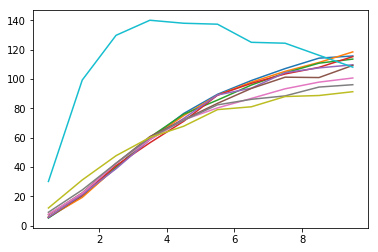

In [5]:
for m in range(10):
    plt.plot(xi_r_s,xi_in_s[:,m]*xi_r_s*xi_r_s);
#plt.xscale('log')

In [6]:
RnameDR = '/mnt/store1/oliverphilcox/Legendre2PCF/qpm_randoms_10x.xyzwj'
# Read first set of randoms
print("Counting lines in DR random file")
total_lines=0
for n, line in enumerate(open(RnameDR, 'r')):
    total_lines+=1

rX_DR,rY_DR,rZ_DR,rW_DR=[np.zeros(total_lines) for _ in range(4)]

print("Reading in DR random data");
for n, line in enumerate(open(RnameDR, 'r')):
    if n%1000000==0:
        print("Reading line %d of %d" %(n,total_lines))
    split_line=np.array(line.split(" "), dtype=float) 
    rX_DR[n]=split_line[0];
    rY_DR[n]=split_line[1];
    rZ_DR[n]=split_line[2];
    rW_DR[n]=split_line[3];
    
N_randDR = len(rX_DR) # number of particles


Counting lines in DR random file
Reading in DR random data
Reading line 0 of 6420510
Reading line 1000000 of 6420510
Reading line 2000000 of 6420510
Reading line 3000000 of 6420510
Reading line 4000000 of 6420510
Reading line 5000000 of 6420510
Reading line 6000000 of 6420510


In [7]:
binfile = '/mnt/store1/oliverphilcox/PowerSpectra/small_r_binning.csv'
## Determine number of radial bins in binning file:
print("Counting lines in binfile");
with open(binfile) as f:
    for i, l in enumerate(f):
        pass
nrbins = i + 1
all_bins = np.loadtxt(binfile)
mean_bins=0.5*(all_bins[:,0]+all_bins[:,1])
if all_bins[0,0]>2:
    raise Exception("Radial binfile should extend close to zero")
print('%s radial bins are used in this file.' %nrbins)


Counting lines in binfile
10 radial bins are used in this file.


In [8]:
def coord_transform(x,y,z):
        # Convert the X,Y,Z coordinates into Ra,Dec,comoving_distance (for use in corrfunc)
        # Shamelessly stolen from astropy
        xsq = x ** 2.
        ysq = y ** 2.
        zsq = z ** 2.

        com_dist = (xsq + ysq + zsq) ** 0.5
        s = (xsq + ysq) ** 0.5 

        if np.isscalar(x) and np.isscalar(y) and np.isscalar(z):
            Ra = math.atan2(y, x)*180./np.pi
            Dec = math.atan2(z, s)*180./np.pi
        else:
            Ra = np.arctan2(y, x)*180./np.pi+180.
            Dec = np.arctan2(z, s)*180./np.pi

        return com_dist, Ra, Dec

In [9]:
r_com_dist_DR,r_Ra_DR,r_Dec_DR = coord_transform(rX_DR,rY_DR,rZ_DR);

In [10]:
r_com_dist_RR=r_com_dist_DR
r_Ra_RR = r_Ra_DR
r_Dec_RR = r_Dec_DR
rW_RR = rW_DR

In [11]:
from Corrfunc.mocks.DDsmu_mocks import DDsmu_mocks
nthreads=20
mu_max = 1.
nmu_bins=10
print("Starting RR counts")
tmpRR=DDsmu_mocks(1,2,nthreads,mu_max,nmu_bins,binfile,r_Ra_RR,r_Dec_RR,r_com_dist_RR,weights1=rW_RR,weight_type='pair_product',verbose=False,is_comoving_dist=True)
RR_counts = tmpRR[:]['npairs']*tmpRR[:]['weightavg'] # sum of weights over bin
RR_counts/=np.sum(rW_RR)**2.
print("RR counts complete")

Starting RR counts
RR counts complete


In [12]:
all_cf = []
for index in range(1,100):
    print("INDEX: %s"%index)
    Dname = '/mnt/store1/oliverphilcox/QPM_proc/qpm_galaxy_%s.xyzw'%str(index).zfill(4)

    total_lines=0
    for n, line in enumerate(open(Dname, 'r')):
        total_lines+=1

    dX,dY,dZ,dW=[np.zeros(total_lines) for _ in range(4)]

    for n, line in enumerate(open(Dname, 'r')):
        split_line=np.array(line.split(" "), dtype=float) 
        dX[n]=split_line[0];
        dY[n]=split_line[1];
        dZ[n]=split_line[2];
        dW[n]=split_line[3];

    N_gal = len(dX) # number of particles

    # Convert coordinates to spherical coordinates
    d_com_dist,d_Ra,d_Dec = coord_transform(dX,dY,dZ);

    tmpDR = DDsmu_mocks(0,2,nthreads,mu_max,nmu_bins,binfile,d_Ra,d_Dec,d_com_dist,weights1=dW,weight_type='pair_product',
                            RA2=r_Ra_DR, DEC2=r_Dec_DR, CZ2 = r_com_dist_DR, weights2 = rW_DR, verbose=False,is_comoving_dist=True)

    DR_counts = tmpDR[:]['npairs']*tmpDR[:]['weightavg']
    DR_counts/= np.sum(rW_DR)*np.sum(dW)

    # Now compute DD counts
    tmpDD=DDsmu_mocks(1,2,nthreads,mu_max,nmu_bins,binfile,d_Ra,d_Dec,d_com_dist,weights1=dW,weight_type='pair_product',verbose=False,is_comoving_dist=True)
    DD_counts = tmpDD[:]['npairs']*tmpDD[:]['weightavg']
    DD_counts/= np.sum(dW)**2.

    # Now use Landay-Szelay estimator:
    xi_function = DD_counts/RR_counts - 2.*DR_counts/RR_counts + 1.

    # Now reshape correlation function and save to file.
    xi_reshape = xi_function.reshape(nrbins,nmu_bins)
    
    all_cf.append(xi_reshape)

INDEX: 1
INDEX: 2
INDEX: 3
INDEX: 4
INDEX: 5
INDEX: 6
INDEX: 7
INDEX: 8
INDEX: 9
INDEX: 10
INDEX: 11
INDEX: 12
INDEX: 13
INDEX: 14
INDEX: 15
INDEX: 16
INDEX: 17
INDEX: 18
INDEX: 19
INDEX: 20
INDEX: 21
INDEX: 22
INDEX: 23
INDEX: 24
INDEX: 25
INDEX: 26
INDEX: 27
INDEX: 28
INDEX: 29
INDEX: 30
INDEX: 31
INDEX: 32
INDEX: 33
INDEX: 34
INDEX: 35
INDEX: 36
INDEX: 37
INDEX: 38
INDEX: 39
INDEX: 40
INDEX: 41
INDEX: 42
INDEX: 43
INDEX: 44


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/store1/oliverphilcox/QPM_proc/qpm_galaxy_0044.xyzw'

In [13]:
out_cf = np.mean(np.asarray(all_cf),axis=0)

In [29]:
xi_r_all=np.concatenate([xi_r_s[:8],xi_r[2:]])
xi_out_all = np.concatenate([out_cf[:8,:],xi_in[2:]])

(0, 20)

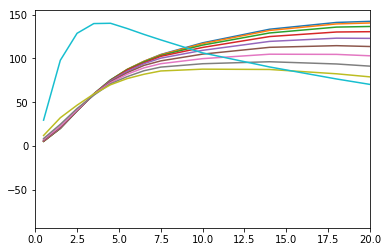

In [37]:
for i in range(10):
    plt.plot(xi_r_all,xi_out_all[:,i]*xi_r_all**2.)
plt.xlim([0,20])

In [28]:
xi_mu_s

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

(0, 15)

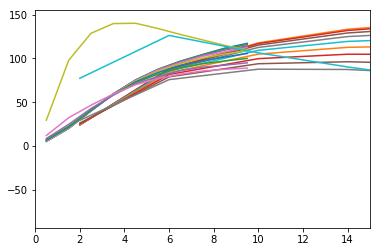

In [14]:
for i in range(10):
    plt.plot(xi_r_s,out_cf[:,i]*xi_r_s**2.);
    plt.plot(xi_r,xi_in[:,i]*xi_r**2.)
plt.xlim([0,15])